# Example T10: Tension Member Lap Splice
Compute the factored tension resistance, $T_r$, of the following plate tension member, lap splice and fasteners.
Ignore the connection details at the far ends of the member (not shown).  Bolts are 3/4" A325 in a
bearing-type connection, in 22mm punched holes (assume threads intercepted).  The plates are of CSA G40.21 350W steel.

In [1]:
from Designer import DesignNotes, show, figure

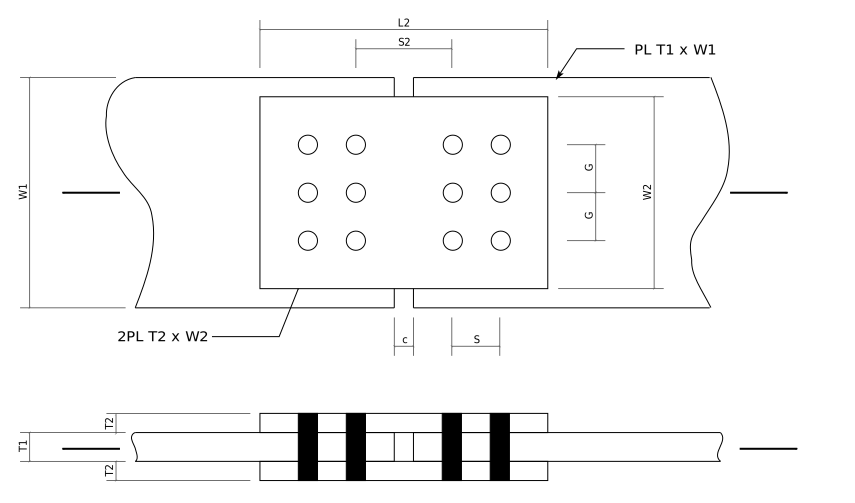

In [2]:
figure("lap-splice-01.svg")

## Import and Setup Library Modules

In [3]:
import pint                  # setup to use the module for computing with units
ureg = pint.UnitRegistry()
mm = ureg['mm']
inch = ureg['inch']
kN = ureg['kN']
MPa = ureg['MPa']
ureg.default_format = '~P'

In [4]:
notes = DesignNotes('Tr',title='Lap Plate Splice',trace=True,units=kN)
REQ = notes.require      # convenient abbreviations
CHK = notes.check
REC = notes.record

## Set the Problem Parameters (data)

In [5]:
# Material properties:
Fy = 350*MPa   # CSA G40.21 350W
Fu = 450*MPa
Fub = 825*MPa  # bolt, ASTM A325, 3/4"
# Main plate dimensions:
W1 = 300*mm
T1 = 25*mm
C = 10*mm   # clearance between ends
# Side plate dimensions:
W2 = 220*mm
T2 = 14*mm
L2 = 350*mm
# bolting dimensions
D = (3/4*inch).to(mm)       # bolt diameter
threads_intercepted = True
HA = (22 + 2)*mm  # hole allowance - 3/4" bolts in 22mm punched holes
G = 75*mm     # gauge (transverse spacing)
S = 75*mm     # longitudinal spacing
NT = 3        # number of bolts across
NL = 2        # number of lines of bolts each side
S2 = 140*mm   # distance between inner lines of bolts
show('Fy,Fu,Fub,W1,T1,C,W2,T2,L2,D,HA,G,S,S2,NT,NL')

Fy  = 350   MPa
Fu  = 450   MPa
Fub = 825   MPa
W1  = 300   mm
T1  = 25    mm
C   = 10    mm
W2  = 220   mm
T2  = 14    mm
L2  = 350   mm
D   = 19.05 mm
HA  = 24    mm
G   = 75    mm
S   = 75    mm
S2  = 140   mm
NT  = 3     
NL  = 2     


## Check Bolting Details
Edge distance, end distance and spacing.  If a REQuirement is not met, execution
terminates with an error message.

In [6]:
REQ( NT >= 2, "NT - Number of bolts across (on a line transverse to load)" )
REQ( NL >= 2, "NL - number of transverse lines (# of bolts per longitudinal line)" )

In [7]:
min_edge = 32*mm      # S16 22.3.2, min edge distance, 3/4" bolt, sheared edge, Table 6
max_edge = min(12*T2,150*mm)    # S16 22.3.3
min_end = min_edge if NL > 2 else 1.5*D  # S16 22.3.4
min_pitch = 2.7*D    # S16 22.3.1
show('min_pitch,min_edge,min_end,max_edge')

min_pitch = 51.43 mm
min_edge  = 32    mm
min_end   = 28.57 mm
max_edge  = 150   mm


### Center plate:

In [8]:
edge = (W1 - (NT-1)*G)/2.
end = (S2 - C)/2.
show('edge,end')
REQ(edge >= min_edge)
REQ(edge <= max_edge)
REQ(end >= min_end)
REQ(S >= min_pitch)
REQ(G >= min_pitch)
REQ(S2 >= S)
REQ(S**2 + G**2 >= min_pitch**2)    # to be more precise ...

edge = 75 mm
end  = 65 mm


### Side plates:

In [9]:
edge = (W2 - (NT-1)*G)/2.
end = (L2 - ((NL-1)*G*2 + S2))/2.
show('edge,end')
REQ(edge >= min_edge)
REQ(edge <= max_edge)
REQ(end >= min_end)

edge = 35 mm
end  = 30 mm


## Factored Resistance

### Main plate

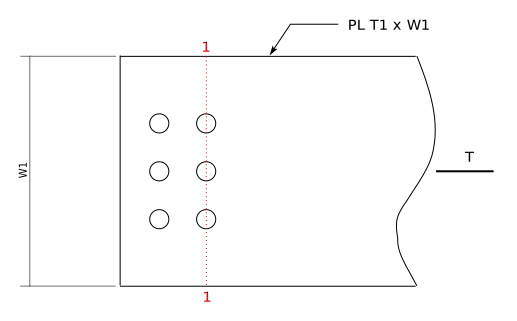

In [10]:
figure("lap-splice-01-main.svg")

#### Yield on Gross Area

If the gross (unreduced) cross-section reaches the yield stress, there will be considerable
axial elongation as yield strains are reached over the length of the member.  This is considered a failure state.

In [11]:
Ag = W1*T1    # gross x-sectional area
phi = 0.9
Tr = phi*Ag*Fy  # S16-14: 13.2 a) i)
REC(Tr,'Gross area yield, centre plate','Ag,Fy')

    Gross area yield, centre plate: Tr = 2362 kN
       (Ag=7500mm², Fy=350MPa)

#### Fracture on Effective Net Area
When the average stress across the net (reduced) area reaches the fracture stress, 
fracture will occur on that area.  This is, of
course, a failure mode.  Normally, an account is made of how non-uniform load transfers can affect the stress
distribution across the cross-section; if the stress distribution is markedly non-uniform, fracture may occur *before* the average stress reaches the ultimate.   This account 
is done by computing and using an effective net area, $A_{ne}$.  

Because the 
bolts in this connection transfer loads approximately uniformly across the entire cross-section, we can consider the effective net area to be equal to the net area in possible failure path 1 in the above figure.   (S16 12.3.3.1)

In [12]:
wn = W1 - NT*HA    # net width: subtract total width of material removed by holes, failure path 1
Ane = An = wn*T1
phiu = 0.75
Tr = phiu*Ane*Fu    # S16-14: 13.2 a) iii)
REC(Tr,'Net section fracture, centre plate','wn,An,Ane,Tr,Fu')

    Net section fracture, centre plate: Tr = 1924 kN
       (wn=228mm, An=5700mm², Ane=5700mm², Fu=450MPa)

#### Block Shear
Other potential failure modes involve tension and shear ruptures in combination around
the bolt holes.  The following figure shows 4 different potential failure patterns that must be
investigated. 

Patterns 1 and 2 are sort of "opposites" - in Pattern 1 in the tension rupture extends across the
end of the bolts, while in Pattern 2 the tension rupture extends from one line of bolts to
the outside edges of the plates.  Pattern 2 probably is only important when there are 2 longitudinal
lines of bolts (there are three shown on the drawing, though our calculations will allow
for any number, 2 or more).  If there are more than 3 longitudnal lines (I.e., more than 3 bolts across),
other patterns similar to Pattern 2 could be drawn but thay will not have lower strengths.

Note that Pattern 4 is often called 'tear-out' or 'pull-out'.

![Block Shear Patterns](images/lap-splice-01-main-blocks.svg)

In [13]:
Fv = (Fy+Fu)/2.      # S16-14: 13.11 footnote
if Fy > 460*MPa:
    Fv = Fy

In [14]:
## Pattern 1
e = S2/2. - C/2.     # end distance to centre of 1st bolt hole
Agv = (e + (NL-1)*S)*T1*2.  # shear area
An = (NT-1)*G * T1          # tension area
Ut = 1.0
phiu = 0.75
Tr = phiu*((Ut*An*Fu) + (0.6*Agv*Fv))     # S16-14: 13.11
REC(Tr,'Block Shear Pattern 1 - centre plate','Ut,An,Agv,Tr');

    Block Shear Pattern 1 - centre plate: Tr = 2526 kN
       (Ut=1.0, An=3750mm², Agv=7000mm²)

In [15]:
## Pattern 2
Agv = 2.*(e + (NL-1)*S)*T1  # shear area
g1 = (W1 - (NT-1)*G)/2.  # edge distance to centre of hole
An = (g1 + g1 - 2.*HA/2.)*T1    # to outside from edge of outside pair of holes
if NT >= 3:
    An = An + (NT-2.)*(G - 2.*HA/2.)*T1    # additional between holes
Ut = 0.6                 # no good guidelines in commentary - this should be conservative
Tr = phiu*((Ut*An*Fu) + (0.6*Agv*Fv))     # S16-14: 13.11
REC(Tr,'Block Shear Pattern 2 - centre plate','Ut,An,Agv,Tr');  

    Block Shear Pattern 2 - centre plate: Tr = 2156 kN
       (Ut=0.6, An=4425mm², Agv=7000mm²)

In [16]:
## Pattern 3
Agv = (e + (NL-1)*S)*T1  # shear area
g1 = (W1 - (NT-1)*G)/2.  # edge distance to centre of hole
An = ((W1-g1) - (NT-0.5)*HA)*T1
Ut = 0.6                 # no good guidelines in commentary - this should be conservative
Tr = phiu*((Ut*An*Fu) + (0.6*Agv*Fv))     # S16-14: 13.11
REC(Tr,'Block Shear Pattern 3 - centre plate','Ut,An,Agv,Tr');

    Block Shear Pattern 3 - centre plate: Tr = 1465 kN
       (Ut=0.6, An=4125mm², Agv=3500mm²)

In [17]:
## Pattern 4 - tear-out
Agv = (e + (NL-1)*S)*T1 * (NT*2.) # shear area
An = 0*mm*mm
Ut = 0.               # N.A.
Tr = phiu*((Ut*An*Fu) + (0.6*Agv*(Fy+Fu)/2.))     # S16-14: 13.11
REC(Tr,'Block Shear Pattern 4 - centre plate','Ut,An,Agv,Tr');

    Block Shear Pattern 4 - centre plate: Tr = 3780 kN
       (Ut=0, An=0mm², Agv=21000mm²)

### Lap Plates

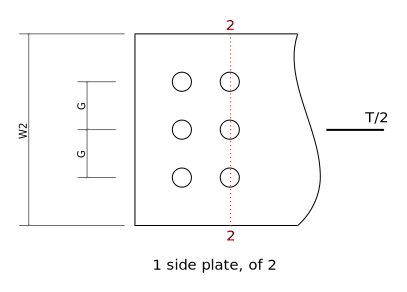

In [18]:
figure("lap-splice-01-side.svg")

The side plates have similar failure modes and so will be computed here without much additional comment.  In all cases we will use the dimensions of a single plate, then will multiply the resistance by 2 to
account for the two plates.

#### Yield on Gross Area

In [19]:
Ag = W2*T2    # gross x-sectional area
phi = 0.9
Tr = 2. * phi*Ag*Fy  # S16-14: 13.2 a) i)
REC(Tr,'Gross area yield, two side plates','Ag,Tr');

    Gross area yield, two side plates: Tr = 1940 kN
       (Ag=3080mm²)

#### Fracture on Effective Net Area

In [20]:
wn = W2 - NT*HA    # subtract total width of material removed by holes, failure path 2
Ane = An = wn*T2
phiu = 0.75
Tr = 2. * phiu*Ane*Fu    # S1614: 13.2 a) iii)
REC(Tr,'Net section fracture, two side plates','wn,An,Ane,Tr');

    Net section fracture, two side plates: Tr = 1399 kN
       (wn=148mm, An=2072mm², Ane=2072mm²)

#### Block Shear

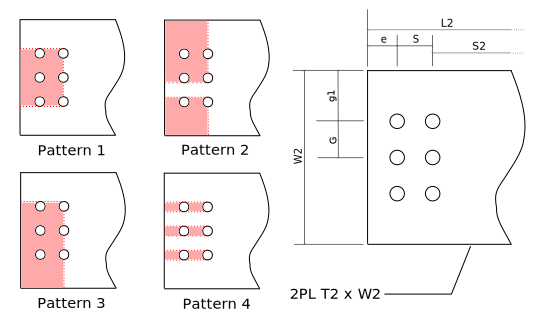

In [21]:
figure("lap-splice-01-side-blocks.svg")

In [22]:
## Pattern 1
e = (L2 - S2 - (NL-1)*S*2.)/2.   # end distance to centre of 1st bolt hole
Agv = (e + (NL-1)*S)*T2*2.  # shear area
An = (NT-1)*G * T2          # tension area
Ut = 1.0
phiu = 0.75
Tr = 2. * phiu*((Ut*An*Fu) + (0.6*Agv*(Fy+Fu)/2.))     # S16-14: 13.11
REC(Tr,'Block Shear Pattern 1 - two side plates','Ut,An,Agv,Tr');

    Block Shear Pattern 1 - two side plates: Tr = 2476 kN
       (Ut=1.0, An=2100mm², Agv=2940mm²)

In [23]:
## Pattern 2
Agv = 2.*(e + (NL-1)*S)*T2  # shear area
g1 = (W2 - (NT-1)*G)/2.  # edge distance to centre of hole
An = (g1 + g1 - 2.*HA/2.)*T2    # to outside from edge of outside pair of holes
if NT >= 3:
    An = An + (NT-2.)*(G - 2.*HA/2.)*T2    # additional between holes
Ut = 0.6                 # no good guidelines in commentary - this should be conservative
Tr = 2. * phiu*((Ut*An*Fu) + (0.6*Agv*(Fy+Fu)/2.))     # S16-14: 13.11
REC(Tr,'Block Shear Pattern 2 - two side plates','Ut,An,Agv,Tr');

    Block Shear Pattern 2 - two side plates: Tr = 1608 kN
       (Ut=0.6, An=1358mm², Agv=2940mm²)

In [24]:
## Pattern 3
Agv = (e + (NL-1)*S)*T2  # shear area
g2 = (W2 - (NT-1)*G)/2.  # edge distance to centre of hole
An = ((W2-g2) - (NT-0.5)*HA)*T2
Ut = 0.6                 # no good guidelines in commentary - this should be conservative
Tr = 2. * phiu*((Ut*An*Fu) + (0.6*Agv*(Fy+Fu)/2.))     # S16-14: 13.11
REC(Tr,'Block Shear Pattern 3 - two side plates','Ut,An,Agv,Tr');

    Block Shear Pattern 3 - two side plates: Tr = 1238 kN
       (Ut=0.6, An=1750mm², Agv=1470mm²)

In [25]:
## Pattern 4 - tear-out
Agv = (e + (NL-1)*S)*T2 * (NT*2.) # shear area
An = 0*mm*mm
Ut = 0.               # N.A.
Tr = 2. * phiu*((Ut*An*Fu) + (0.6*Agv*(Fy+Fu)/2.))     # S16-14: 13.11
REC(Tr,'Block Shear Pattern 4 - two side plates','Ut,An,Agv,Tr');

    Block Shear Pattern 4 - two side plates: Tr = 3175 kN
       (Ut=0, An=0mm², Agv=8820mm²)

### Fasteners (Bolts)

#### Shear

Here we compute the shear strength of one of the bolt groups.

In [26]:
n = NT*NL      # number of bolts
m = 2          # number of faying surfaces
Ab = 3.14159*D*D/4.
phib = 0.80
Vr = 0.60*phib*n*m*Ab*Fub      # S16-14: 13.12.1.2 c)
if (NL-1)*S >= 760*mm:
    Vr = (0.5/0.6)*Vr
if threads_intercepted:
    Vr = 0.7*Vr
REC(Vr,'Shear resistance of bolts','n,m,Ab');

    Shear resistance of bolts: Tr = 948.1 kN    <<<--- GOVERNS
       (n=6, m=2, Ab=285.0mm²)

#### Bearing

In [27]:
n = NT*NL
t = min(T1,2.*T2)
phibr = 0.80
Br = 3.*phibr*n*t*D*Fu
REC(Br,'Bearing resistance at bolt holes','n,D,t,Fu');

    Bearing resistance at bolt holes: Tr = 3086 kN
       (n=6, D=19.05mm, t=25mm, Fu=450MPa)

## Summary

In [28]:
notes.summary()


Summary of DesignNotes for Tr: Lap Plate Splice

Values of Tr:
-------------
    Gross area yield, centre plate:          Tr = 2360 kN
    Net section fracture, centre plate:      Tr = 1920 kN
    Block Shear Pattern 1 - centre plate:    Tr = 2530 kN
    Block Shear Pattern 2 - centre plate:    Tr = 2160 kN
    Block Shear Pattern 3 - centre plate:    Tr = 1470 kN
    Block Shear Pattern 4 - centre plate:    Tr = 3780 kN
    Gross area yield, two side plates:       Tr = 1940 kN
    Net section fracture, two side plates:   Tr = 1400 kN
    Block Shear Pattern 1 - two side plates: Tr = 2480 kN
    Block Shear Pattern 2 - two side plates: Tr = 1610 kN
    Block Shear Pattern 3 - two side plates: Tr = 1240 kN
    Block Shear Pattern 4 - two side plates: Tr = 3180 kN
    Shear resistance of bolts:               Tr = 948 kN    <<<--- GOVERNS
    Bearing resistance at bolt holes:        Tr = 3090 kN

    Governing Value:
    ----------------
       Tr = 948 kN


## Things not done
* L/r ratio
* Connections at ends